# Menganalisis risiko gagal bayar peminjam


# Konten <a id='back'></a>

* [Pendahuluan](#intro)
* [Tahap 1. Eksplorasi data](#eksplorasi_data)
    * [Kesimpulan](#eksplorasi_conclusions)
* [Tahap 2. Transformasi data](#transformasi_data)
    * [2.1 Memeriksa data pada setiap kolom](#distribusi)
    * [2.2 Periksa data duplicated](#duplicates)
    * [2.3 Membuat dictionary](#dictionary)
    * [2.4 Memperbaiki nilai hilang](#missing_values)
* [Tahap 3. Pengkategorian data](#category_data)
* [Tahap 4. Pengujian hipotesis](#hypotheses)
    * [3.1 Hipotesis 1: Korelasi antara memiliki anak dengan probabilitas melakukan gagal bayar pinjaman](#children)
    * [3.2 Hipotesis 2: Korelasi antara status keluarga dengan probabilitas melakukan gagal bayar pinjaman](#family)
    * [3.3 Hipotesis 3: Korelasi antara tingkat pendapatan dengan probabilitas melakukan gagal bayar pinjaman](#income)
    * [3.4 Hipotesis 4: Pengaruh tujuan kredit terhadap persentase gagal bayar](#purpose)
* [Kesimpulan Umum](#conclusions)
* [Temuan](#end)

## Pendahuluan <a id='intro'></a>
Tugasmu adalah menyiapkan laporan untuk divisi kredit suatu bank. Kamu akan mencari tahu pengaruh status perkawinan seorang nasabah dan jumlah anak yang dimilikinya terhadap probabilitas gagal bayar dalam pelunasan pinjaman. Pihak bank sudah memiliki beberapa data mengenai kelayakan kredit nasabah.

Laporanmu akan dipertimbangkan pada saat membuat **penilaian kredit** untuk calon nasabah. **Penilaian kredit** digunakan untuk mengevaluasi kemampuan calon peminjam untuk melunasi pinjaman mereka.

### Tujuan: 
Menguji empat hipotesis:
1. Mengetahui hubungan antara memiliki anak dan probabilitas seseorang melakukan gagal bayar pinjaman
2. Mengetahui hubungan antara status perkawinan dan probabilitas seseorang melakukan gagal bayar pinjaman
3. Mengetahui hubungan antara tingkat pendapatan dan probabilitas seseorang melakukan gagal bayar pinjaman
4. Mengetahui tujuan pinjaman memengaruhi probabilitas seseorang melakukan gagal bayar pinjaman

### Tahapan
Data terkait pengguna disimpan dalam file `/datasets/credit_scoring_eng.csv`. Tidak ada informasi terkait kualitas data tersebut, karena itu kamu perlu memeriksanya terlebih dahulu sebelum menguji hipotesis.

Pertama-tama, kamu akan mengevaluasi kualitas data dan melihat apakah masalahnya signifikan. Kemudian, selama pra-pemrosesan data, kamu akan mencoba mengatasi masalah yang paling serius.
 
Proyek ini terdiri dari tiga tahap:
 1. Mengeksplorasi data
 2. Mentransformasi data
 3. Mengategorikan data
 4. Melakukan pengujian hipotesis

 
[Kembali ke Konten](#back)

## Buka file data dan baca informasi umumnya. 

Mengimpor library `pandas`, `seaborn` dan `matplotlib.pyplot` dan membaca file ke data `credit`

In [1]:
# Muat semua library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Muat datanya
credit = pd.read_csv('/datasets/credit_scoring_eng.csv')

## Eksplorasi data <a id='eksplorasi_data'></a>

**Deskripsi data**
- `children` - jumlah anak dalam keluarga
- `days_employed` - pengalaman kerja nasabah dalam hari
- `dob_years` - usia nasabah dalam tahun
- `education` - tingkat pendidikan nasabah
- `education_id` - pengidentifikasi untuk tingkat pendidikan nasabah
- `family_status` - status perkawinan
- `family_status_id` - pengidentifikasi untuk status perkawinan nasabah
- `gender` - jenis kelamin nasabah
- `income_type` - jenis pekerjaan
- `debt` - apakah nasabah pernah melakukan gagal bayar pinjaman
- `total_income` - pendapatan bulanan
- `purpose` - tujuan mendapatkan pinjaman


Melakukan pengecekan ukuran baris dan kolom dalam dataset

In [3]:
# Mari kita lihat berapa banyak baris dan kolom yang dimiliki oleh dataset kita
credit.shape

(21525, 12)

Menampilkan 15 baris pertama tabel

In [4]:
# Mari tampilkan N baris pertama
credit.head(15)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


Kita dapat melihat masalah pada dua kolom:

1. `days_employed` memiliki data bernilai negatif dan float, kemungkinan jumlah hari dan masa kerja tidak mungkin bernilai negatif dan bernilai pecahan, serta terdapat nilai yang hilang pada data ini pada index 12
2. `total_income` memiliki data yang hilang pada index 12

Mengeluarkan informasi umum terkait dataset

In [5]:
# Dapatkan informasi data
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Informasi yang perlu diperhatikan:
1. pada dataset dapat dilihat hanya data pada `data days_empoyed` dan `total_income` memiliki data yang hilang, sehingga diperlukan pemeriksaan lebih lanjut mengenai data tersebut
2. type data sepertinya sudah sesuai dengan data yang ditampilkan sehingga tidak memerlukan perhatian lebih

In [6]:
# Mari kita lihat tabel yang telah difilter dengan nilai yang hilang di kolom pertama yang mengandung data yang hilang
credit_null = credit.loc[credit['days_employed'].isnull()]
credit_null

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


dari tabel diatas dapat diketahui bahwa:
1. kolom yang hilang tidak simetris, karena data yang hilang hanya pada bagian `days_employed` dan `total_income`
2. terlihat bahwa kemungkinan jumlah dan letak data yang hilang pada kedua kolom ini sama persis, sehingga dibutuhkan analisa lebih lanjut

In [7]:
# Mari kita terapkan beberapa kondisi untuk memfilter data dan melihat jumlah baris dalam tabel yang telah difilter.
credit[(credit['days_employed'].isnull()) & (credit['total_income'].isnull())].shape

(2174, 12)

In [8]:
#jumlah data yang hilang
credit.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [9]:
#persentase data yang hilang
credit.isnull().sum() / credit.shape[0] * 100

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

**Kesimpulan sementara** 

dari data yang telah di dapatkan dapat ditarik beberapa kesimpulan:
1. data pada kolom `days_employed` dan `total_income` memiliki data yang hilang dalam jumlah yang sama dan sesuai dengan jumlah nilai yang hilang pada data, dalam pengecekan tersebut juga diketahui bahwa mereka memiliki nilai yang hilang tepat pada baris yang sama, sehingga perlu dicaritahu kenapa nilai tersebut bisa hilang dan apa polanya.
2. jumlah keseluruhan data adalah 21525 dan jumlah data yang hilang adalah 2174 berarti jumlah data yang hilang adalah kurang dari 10% dari data yang kita miliki, sehingga diperlukan analisa lebih lanjut untuk mengetahui dan mengisi data yang hilang tersebut, data ini tidak bisa dihilangkan begitu saja karna kemungkinan dapat berpengaruh besar terhadap analisa yang akan dilakukan
3. kemungkinan yang menurut saya mungkin berpengaruh adalah, gender perempuan kemungkinan karena mereka tidak mengetahui pendapatan pasti setiap bulannya dan tidak mengetahui berapa lama mereka bekerja, atau mereka memilih untuk tidak bekerja sehingga `days_employed` dan `total_income` menjadi bernilai `Nan`

Jelas bahwa data yang kita miliki cukup untuk menguji hipotesis. Sayangnya, terdapat sejumlah nilai yang hilang.

Untuk melanjutkan analisis, kita perlu melakukan pemeriksaan distribusi data terlebih dahulu untuk melihat faktor apa saja yang memungkinkan berpengaruh untuk mengisi nilai yang hilang.


In [10]:
# Mari kita periksa nasabah yang tidak memiliki data tentang karakteristik yang teridentifikasi dan kolom dengan nilai yang hilang
credit_null.describe()


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,2174.000000,0.0,2174.000000,2174.000000,2174.000000,2174.000000,0.0
mean,0.552438,NaN,43.632015,0.800828,0.975161,0.078197,NaN
std,1.469356,NaN,12.531481,0.530157,1.418220,0.268543,NaN
min,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,34.000000,0.250000,0.000000,0.000000,NaN
50%,0.000000,NaN,43.000000,1.000000,0.000000,0.000000,NaN
75%,1.000000,NaN,54.000000,1.000000,1.000000,0.000000,NaN
max,20.000000,NaN,73.000000,3.000000,4.000000,1.000000,NaN


In [11]:
# Periksalah distribusinya
credit_count_gender = credit_null['gender'].value_counts()
credit_percent_gender = credit_null['gender'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={"percent%" : credit_percent_gender, "count" : credit_count_gender}).rename_axis("unique")

,percent%,count
unique,,
F,68.26%,1484
M,31.74%,690


In [12]:
#persentase data yang hilang berdasarkan gender
credit_null['gender'].value_counts().sort_values(ascending=False) / credit_null.shape[0] * 100

F    68.26127
M    31.73873
Name: gender, dtype: float64


**Kemungkinan penyebab hilangnya nilai dalam data**

dari tabel yang terlihat bahwa 68% dari data yang hilang terkonfirmasi memiliki gender perempuan.

diperlukan pengecekan distribusi terhadap data kolom lainnya

In [13]:
# Periksalah distribusinya berdasarkan family status
credit_count_family = credit_null['family_status'].value_counts()
credit_percent_family = credit_null['family_status'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={"percent%" : credit_percent_family, "count" : credit_count_family}).rename_axis("unique")

,percent%,count
unique,,
married,56.9%,1237
civil partnership,20.33%,442
unmarried,13.25%,288
divorced,5.15%,112
widow / widower,4.37%,95


In [14]:
# Memeriksa distribusi di seluruh dataset (income type)
credit_count_income = credit_null['income_type'].value_counts()
credit_percent_income = credit_null['income_type'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={"percent%" : credit_percent_income, "count" : credit_count_income}).rename_axis("unique")

,percent%,count
unique,,
employee,50.83%,1105
business,23.37%,508
retiree,19.0%,413
civil servant,6.76%,147
entrepreneur,0.05%,1


In [15]:
# Memeriksa distribusi di seluruh dataset (education)
credit_count_edu = credit_null['education'].value_counts()
credit_percent_edu = credit_null['education'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={"percent%" : credit_percent_edu, "count" : credit_count_edu}).rename_axis("unique")

,percent%,count
unique,,
secondary education,64.77%,1408
bachelor's degree,22.82%,496
SECONDARY EDUCATION,3.08%,67
Secondary Education,2.99%,65
some college,2.53%,55
Bachelor's Degree,1.15%,25
BACHELOR'S DEGREE,1.06%,23
primary education,0.87%,19
Some College,0.32%,7


In [16]:
# Memeriksa distribusi di seluruh dataset pada kolom jumlah anak
credit_count_child = credit_null['children'].value_counts()
credit_percent_child = credit_null['children'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={"percent%" : credit_percent_child, "count" : credit_count_child}).rename_axis("unique")

,percent%,count
unique,,
0,66.19%,1439
1,21.85%,475
2,9.38%,204
3,1.66%,36
20,0.41%,9
4,0.32%,7
-1,0.14%,3
5,0.05%,1


**Kesimpulan sementara**

data yang hilang dan dataset yang asli memiliki distribusi yang sama dari nilai tertinggi ke terendah artinya data yang hilang terdistribusi secara merata sesuai dengan dataset asli kita

karena kebanyakan data nilai yang hilang adalah perempuan, sudah menikah dan sedang bekerja, perlu dianalisa lebih lanjut pola apa yang menjadi kemiripan diantara semuanya.

perlu diperiksa menggunakan 3 dataset: dataset dengan hanya nilai yang kosong `credit_null`, dataset asli `credit`, dan dataset yang hanya memiliki nilai `credit_nonnull`

**Memeriksa distribusi data aslinya**

In [17]:
#data yang dimiliki secara umum (gender)
credit_count_gen_gender = credit['gender'].value_counts()
credit_percent_gen_gender = credit['gender'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={"percent%" : credit_percent_gen_gender, "count" : credit_count_gen_gender}).rename_axis("unique")

,percent%,count
unique,,
F,66.14%,14236
M,33.86%,7288
XNA,0.0%,1


In [18]:
credit_count_gen_family = credit['family_status'].value_counts()
credit_percent_gen_family = credit['family_status'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={"percent%" : credit_percent_gen_family, "count" : credit_count_gen_family}).rename_axis("unique")

,percent%,count
unique,,
married,57.51%,12380
civil partnership,19.41%,4177
unmarried,13.07%,2813
divorced,5.55%,1195
widow / widower,4.46%,960


In [19]:
#data yang dimiliki secara umum (income_type)
credit_count_gen_income = credit['income_type'].value_counts()
credit_percent_gen_income = credit['income_type'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={"percent%" : credit_percent_gen_income, "count" : credit_count_gen_income}).rename_axis("unique")

,percent%,count
unique,,
employee,51.66%,11119
business,23.62%,5085
retiree,17.91%,3856
civil servant,6.78%,1459
entrepreneur,0.01%,2
unemployed,0.01%,2
student,0.0%,1
paternity / maternity leave,0.0%,1


In [20]:
#data yang dimiliki secara umum (education)
credit_count_gen_edu = credit['education'].value_counts()
credit_percent_gen_edu = credit['education'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={"percent%" : credit_percent_gen_edu, "count" : credit_count_gen_edu}).rename_axis("unique")

,percent%,count
unique,,
secondary education,63.88%,13750
bachelor's degree,21.92%,4718
SECONDARY EDUCATION,3.59%,772
Secondary Education,3.3%,711
some college,3.1%,668
BACHELOR'S DEGREE,1.27%,274
Bachelor's Degree,1.25%,268
primary education,1.16%,250
Some College,0.22%,47


In [21]:
#data yang dimiliki secara umum (children)
credit_count_gen_child = credit['children'].value_counts()
credit_percent_gen_child = credit['children'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={"percent%" : credit_percent_gen_child, "count" : credit_count_gen_child}).rename_axis("unique")

,percent%,count
unique,,
0,65.73%,14149
1,22.38%,4818
2,9.55%,2055
3,1.53%,330
20,0.35%,76
-1,0.22%,47
4,0.19%,41
5,0.04%,9


**Kesimpulan sementara**


dapat dilihat pada tabel distribusi data yang hilang dan dataset memiliki pola yang sama, diurutkan dari yang terendah ke yang tinggi, karena pada dataset asli nilai tersebut lebih tinggi maka kemungkinan nilainya untuk hilang juga akan lebih besar dibandingkan dengan dataset yang memiliki `count` lebih rendah.

**Membandingkan distribusi data yang tidak memiliki data yang hilang**

In [22]:
credit_nonnull = credit.loc[~(credit['days_employed'].isnull())]

In [23]:
#data yang dimiliki secara umum (gender)
credit_count_non_gender = credit_nonnull['gender'].value_counts()
credit_percent_non_gender = credit_nonnull['gender'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={"percent%" : credit_percent_non_gender, "count" : credit_count_non_gender}).rename_axis("unique")

,percent%,count
unique,,
F,65.9%,12752
M,34.1%,6598
XNA,0.01%,1


In [24]:
credit_count_non_family = credit_nonnull['family_status'].value_counts()
credit_percent_non_family = credit_nonnull['family_status'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={"percent%" : credit_percent_non_family, "count" : credit_count_non_family}).rename_axis("unique")

,percent%,count
unique,,
married,57.58%,11143
civil partnership,19.3%,3735
unmarried,13.05%,2525
divorced,5.6%,1083
widow / widower,4.47%,865


In [25]:
#data yang dimiliki secara umum (income_type)
credit_count_non_income = credit_nonnull['income_type'].value_counts()
credit_percent_non_income = credit_nonnull['income_type'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={"percent%" : credit_percent_non_income, "count" : credit_count_non_income}).rename_axis("unique")

,percent%,count
unique,,
employee,51.75%,10014
business,23.65%,4577
retiree,17.79%,3443
civil servant,6.78%,1312
unemployed,0.01%,2
student,0.01%,1
paternity / maternity leave,0.01%,1
entrepreneur,0.01%,1


In [26]:
#data yang dimiliki secara umum (education)
credit_count_non_edu = credit_nonnull['education'].value_counts()
credit_percent_non_edu = credit_nonnull['education'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={"percent%" : credit_percent_non_edu, "count" : credit_count_non_edu}).rename_axis("unique")

,percent%,count
unique,,
secondary education,63.78%,12342
bachelor's degree,21.82%,4222
SECONDARY EDUCATION,3.64%,705
Secondary Education,3.34%,646
some college,3.17%,613
BACHELOR'S DEGREE,1.3%,251
Bachelor's Degree,1.26%,243
primary education,1.19%,231
Some College,0.21%,40


In [27]:
#data yang dimiliki secara umum (children)
credit_count_non_child = credit_nonnull['children'].value_counts()
credit_percent_non_child = credit_nonnull['children'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={"percent%" : credit_percent_non_child, "count" : credit_count_non_child}).rename_axis("unique")

,percent%,count
unique,,
0,65.68%,12710
1,22.44%,4343
2,9.57%,1851
3,1.52%,294
20,0.35%,67
-1,0.23%,44
4,0.18%,34
5,0.04%,8


**Kesimpulan** <a id='eksplorasi_conclusions'></a>

1. pola yang saya lihat adalah kebanyakan data yang hilang mempunyai gender perempuan, telah menikah dan sedang bekerja, dataset memiliki nilai sebanding, baik menggunakan `credit`, `credit_null` dan `credit_nonnull` kemungkinan ini dikarenakan jumlah data pada kolom tersebut yang sangat banyak sehingga kemungkinan data hilangpun semakin besar, sehingga masih diperlukan untuk pemeriksaan kembali terkait data tersebut
2. saya akan memeriksa data berdasarkan beberapa faktor lalu dengan mencari nilai `mean` dan `median` nya, jika data tersebut terlalu ekstrim saya akan mempertimbangkan untuk mengisi data tersebut dengan menggunakan `median`

Rencana singkat langkah selanjutnya:
1. seperti yang dilihat pada tabel di atas banyak data dengan informasi yang kurang jelas dan berulang seperti kolom `education`, `children`, dan `gender` sehingga dibutuhkan pengolahan data terlebih dahulu
2. untuk mengatasi hilangnya nilai `total_income` akan saya periksa berdasarkan faktor-faktor yang mungkin mempengaruhi nilai `total_income`, kemudian menentukan akan menggunakan `median` atau `mean` berdasarkan kategori yang telah ditentukan
3. untuk mengatasi hilangnya nilai `days_employed` saya akan memeriksa rata-rata dan mediannya untuk melihat distribusi nilai apa saja yang mungkin mempengaruhi nilai tersebut, kemudian akan dipilih untuk menggunakan `median` atau `mean` untuk mengisi nilai yang hilang

## Transformasi data <a id='transformasi_data'></a>


### Memeriksa data setiap kolom <a id='distribusi'></a>

#### Periksa data pada kolom `education`

In [28]:
# Mari kita lihat semua nilai di kolom pendidikan untuk memeriksa ejaan apa yang perlu diperbaiki
credit['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

terjadinya kesalahan dalam penginputan data dikarenakan kecenderungan pengetikan setiap orang, untuk mengurangi kesalahan tersebut diperlukan pengubahan dikarenakan beberapa data menggunakan huruf besar, dipilih untuk menyeragamkan dengan cara menggunakan metode `str_lower`

In [29]:
# Perbaiki pencatatan jika diperlukan
credit['education'] = credit['education'].str.lower()

In [30]:
# Periksa semua nilai di kolom untuk memastikan bahwa kita telah memperbaikinya dengan tepat
credit['education'].value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

#### Periksa data kolom `children`

In [31]:
# Mari kita lihat distribusi nilai pada kolom `children
credit['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

karena kemungkinan adanya kesalahan penginputan data (typo) sehingga ada nilai 20 dan -1 saya berpikir untuk mengganti nilai 20 menjadi 2 dan -1 menjadi 1

In [32]:
# [perbaiki data berdasarkan keputusanmu]
# Mengganti nilai -1 dengan 1
credit['children'] = credit['children'].replace(-1, 1)

# Mengganti nilai 20 dengan 2
credit['children'] = credit['children'].replace(20, 2)

In [33]:
# Periksa kembali kolom `children` untuk memastikan bahwa semuanya telah diperbaiki
credit['children'].value_counts()


0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

#### Periksa data dalam kolom `days_employed`

In [34]:
# Temukan data yang bermasalah di kolom `days_employed` jika memang terdapat masalah dan hitung persentasenya
credit['days_employed'].value_counts()

-327.685916     1
-1580.622577    1
-4122.460569    1
-2828.237691    1
-2636.090517    1
               ..
-7120.517564    1
-2146.884040    1
-881.454684     1
-794.666350     1
-3382.113891    1
Name: days_employed, Length: 19351, dtype: int64

In [35]:
credit.loc[credit['days_employed'] < 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
...,...,...,...,...,...,...,...,...,...,...,...,...
21519,1,-2351.431934,37,graduate degree,4,divorced,3,M,employee,0,18551.846,buy commercial real estate
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [36]:
#menghitung persentase data yang salah pada kolom days employed
# Menghitung jumlah nilai negatif di kolom 'days_employed'
negative_days = credit['days_employed'] < 0
negative_days_count = negative_days.sum()

# Menghitung persentase data yang bermasalah
percentage_negative_days = (negative_days_count / credit.shape[0]) * 100

percentage_negative_days

73.89547038327527

data bermasalah hampir disetiap nilai sebanyak 73%, kemungkinan ini kesalahan sistem penginputan, sehingga hampir semua nilai bernilai negatif. pengubahan nilai diperlukan agar tidak terjadi kesalahan lanjutan

In [37]:
# Atasi nilai yang bermasalah, jika ada
# Mengubah nilai-nilai dalam kolom 'days_employed' menjadi positif
credit['days_employed'] = credit['days_employed'].abs()


In [38]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
credit['days_employed'].value_counts()

142.276217       1
1849.622944      1
886.253127       1
2539.534295      1
390574.985524    1
                ..
1394.302246      1
2325.720832      1
4086.407828      1
1259.497032      1
1636.419775      1
Name: days_employed, Length: 19351, dtype: int64

#### Periksa data pada kolom `dob_years`

In [39]:
# Periksa `dob_years` untuk nilai yang mencurigakan dan hitung persentasenya
credit_age_count = credit['dob_years'].value_counts().sort_index()
#credit_age_count.sort_index()
credit_age_count
#credit.sort_values(by='dob_years').value_counts()


0     101
19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [40]:
#menghitung persentase data yang berumur 0
credit_age_count / credit.shape[0] *100

0     0.469222
19    0.065041
20    0.236934
21    0.515679
22    0.850174
23    1.180023
24    1.226481
25    1.658537
26    1.895470
27    2.290360
28    2.336818
29    2.531940
30    2.508711
31    2.601626
32    2.369338
33    2.699187
34    2.801394
35    2.866434
36    2.578397
37    2.494774
38    2.778165
39    2.662021
40    2.829268
41    2.819977
42    2.773519
43    2.383275
44    2.541231
45    2.308943
46    2.206736
47    2.229965
48    2.499419
49    2.360046
50    2.387921
51    2.081301
52    2.248548
53    2.132404
54    2.225319
55    2.058072
56    2.262485
57    2.137050
58    2.141696
59    2.062718
60    1.751452
61    1.649245
62    1.635308
63    1.249710
64    1.231127
65    0.901278
66    0.850174
67    0.775842
68    0.459930
69    0.394890
70    0.301974
71    0.269454
72    0.153310
73    0.037166
74    0.027875
75    0.004646
Name: dob_years, dtype: float64

nilai umur `0` sangat tidak masuk akal karena tidak mungkin seorang bayi melakukan peminjaman, meskipun persentasenya cukup rendah sehingga diperlukan penginputan data secara manual, dikarenakan data memiliki nilai yang sangat beragam dan tergolong ekstrim penggunaan median lebih baik untuk digunakan

In [41]:
# Atasi masalah pada kolom `dob_years`, jika terdapat masalah
credit_age_mean = credit['dob_years'].mean()
credit_age_median = credit['dob_years'].median()

#Mengubah umur 0 menjadi nilai median
credit['dob_years'] = credit['dob_years'].replace(0, credit_age_median)

In [42]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
credit['dob_years'].value_counts().sort_index()

19.0     14
20.0     51
21.0    111
22.0    183
23.0    254
24.0    264
25.0    357
26.0    408
27.0    493
28.0    503
29.0    545
30.0    540
31.0    560
32.0    510
33.0    581
34.0    603
35.0    617
36.0    555
37.0    537
38.0    598
39.0    573
40.0    609
41.0    607
42.0    698
43.0    513
44.0    547
45.0    497
46.0    475
47.0    480
48.0    538
49.0    508
50.0    514
51.0    448
52.0    484
53.0    459
54.0    479
55.0    443
56.0    487
57.0    460
58.0    461
59.0    444
60.0    377
61.0    355
62.0    352
63.0    269
64.0    265
65.0    194
66.0    183
67.0    167
68.0     99
69.0     85
70.0     65
71.0     58
72.0     33
73.0      8
74.0      6
75.0      1
Name: dob_years, dtype: int64

#### Periksa data pada kolom `family_status`


In [43]:
# Mari kita lihat nilai untuk kolom ini
credit['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

In [44]:
credit['family_status_id'].value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

terlihat bahwa kolom ini sudah memiliki data yang sangat baik sehingga tidak diperlukan perbaikan

#### Periksa data pada kolom `gender`


In [47]:
# Mari kita liat nilai dalam kolom ini
credit['gender'].value_counts().sort_index()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

kemungkinan terjadi kesalahan penginputan data sehingga ada gender XNA gender tersebut dapat di hapus saja

In [48]:
# Atasi nilai-nilai yang bermasalah, jika ada
#Mengubah XNA menjadi F, karna data F sangat banyak dan kemungkinan terjadinya kesalahan penulisan walaupun tidak terlalu berpengaruh
credit = credit[credit['gender'] != 'XNA']

In [49]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
credit['gender'].value_counts().sort_index()


F    14236
M     7288
Name: gender, dtype: int64

#### Periksa data pada kolom `income_type`


In [50]:
# Mari kita lihat nilai dalam kolom ini
credit['income_type'].value_counts()

employee                       11119
business                        5084
retiree                         3856
civil servant                   1459
entrepreneur                       2
unemployed                         2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

terlihat bahwa kolom ini sudah memiliki data yang sangat baik sehingga tidak diperlukan perbaikan

### Periksa data duplicated <a id='duplicates'></a>

Saatnya melihat apakah ada duplikat di dalam data kita.

In [53]:
# Periksa duplikat
credit.duplicated().sum()

72

karena data duplicated hanya 72 data maka data tersebut dapat langsung dihapus

In [55]:
# Atasi duplikat, jika ada
credit_cleaned = credit.drop_duplicates().reset_index(drop=True)

In [56]:
credit_cleaned.duplicated().sum()

0

In [57]:
# Periksa ukuran dataset yang sekarang kamu miliki setelah manipulasi pertama yang kamu lakukan
credit_cleaned.shape

(21452, 12)

In [58]:
#persentase data duplicates yang dihapus dari data keseluruhan
(credit.shape[0] - credit_cleaned.shape[0]) / credit.shape[0] * 100

0.3345103140680171

sekarang dataset berkurang karena duplicates telah dihapus, persentase pengurangannya kurang dari 0,5% dari data keseluruhan, ini akan membantu pengolahan data selanjutnya, mulai pada tahap ini harus diingat bahwa kita akan melakukan pengolahan data pada dataset `credit_cleaned`

### Membuat dictionary <a id='dictionary'></a>

Terdapat beberapa dictionary yang mungkin akan diperlukan yaitu kolom `education` dan `education_id` serta `family_status` dan `family_status_id`

#### Memeriksa dictionary

**dictionary education**

In [59]:
# Temukan dictionary
# education dictionary
dict_edu = pd.Series(credit_cleaned.education.values,index=credit_cleaned.education_id).to_dict()
dict_edu

{0: "bachelor's degree",
 1: 'secondary education',
 2: 'some college',
 3: 'primary education',
 4: 'graduate degree'}

**dictionary family_status**

In [60]:
#family_status
dict_family = dict(zip(credit_cleaned.family_status_id, credit_cleaned.family_status))
# Menampilkan tabel
dict_family

{0: 'married',
 1: 'civil partnership',
 2: 'widow / widower',
 3: 'divorced',
 4: 'unmarried'}

### Memperbaiki nilai yang hilang di `total_income` <a id='missing_values'></a>

kolom hilang terdapat pada kolom `total_income` cara untuk menanganinya adalah dengan cara memeriksa faktor apa saja yang mungkin mempengaruhi hilangnya `total_income` dan mencari karakteristik apa saja yang lebih berpotensi untuk mengisi data nilai yang kosong, setelah ditemukan ditentukan akan menggunakan `mean` atau `median` yang lebih sesuai.

Untuk mengatasi total nilai pendapatan yang hilang. Buat kategori usia untuk nasabah. Buat kolom baru yang memuat kategori usia. Strategi ini dapat membantu untuk menghitung total nilai pendapatan

In [61]:
# Mari kita tulis sebuah fungsi untuk menghitung kategori usia
def kelompok_umur(age):
    if age < 18:
        return 'Underage'
    elif age < 25:
        return '18-24'
    elif age < 35:
        return '25-34'
    elif age < 45:
        return '35-44'
    elif age < 55:
        return '45-54'
    elif age < 65:
        return '55-64'
    else:
        return '65+'
    

In [62]:
# Lakukan pengujian untuk melihat apakah fungsimu bekerja atau tidak
test_age = 25
kelompok_umur(test_age)

'25-34'

In [63]:
# Buatlah kolom baru berdasarkan fungsi
credit_cleaned['age_category'] = credit_cleaned['dob_years'].apply(kelompok_umur)


In [64]:
# Periksa bagaimana nilai di dalam kolom baru
credit_cleaned.head(10)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,35-44
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,35-44
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,25-34
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,25-34
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,45-54
5,0,926.185831,27.0,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,25-34
6,0,2879.202052,43.0,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,35-44
7,0,152.779569,50.0,secondary education,1,married,0,M,employee,0,21731.829,education,45-54
8,2,6929.865299,35.0,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,35-44
9,0,2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,35-44


Faktor yang mempengaruhi pendapatan biasanya disebabkan oleh gender, usia, status pendidikan, jumlah anak, status keluarga, dan jenis pekerjaan, sehingga perlu diperhatikan lagi yang paling mungkin dapat berpengaruh.

Membuat tabel yang hanya memuat data tanpa nilai yang hilang. Data ini akan digunakan untuk memperbaiki nilai yang hilang

In [65]:
# Buat tabel tanpa nilai yang hilang dan tampilkan beberapa barisnya untuk memastikan semuanya berjalan dengan baik
#credit_nonnull = credit.dropna()
#credit_nonnull.head(15)
credit_nonnull = credit_cleaned.loc[~(credit_cleaned['days_employed'].isnull())]
credit_nonnull.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,35-44
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,35-44
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,25-34
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,25-34
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,45-54
5,0,926.185831,27.0,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,25-34
6,0,2879.202052,43.0,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,35-44
7,0,152.779569,50.0,secondary education,1,married,0,M,employee,0,21731.829,education,45-54
8,2,6929.865299,35.0,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,35-44
9,0,2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,35-44


**Rata-rata dan median pendapatan berdasarkan kelompok umur**

In [66]:
# Perhatikan nilai rata-rata untuk pendapatan berdasarkan faktor kelompok umur yang telah kamu identifikasi
mean_income_by_age = credit_nonnull.groupby('age_category')['total_income'].mean()
mean_income_by_age

age_category
18-24    22690.598566
25-34    27337.934929
35-44    28670.047653
45-54    27385.188219
55-64    24601.730826
65+      21542.650450
Name: total_income, dtype: float64

In [67]:
# Perhatikan nilai median untuk pendapatan berdasarkan faktor (gender dan kelompok umur) yang telah kamu identifikasi
median_income_by_age = credit_nonnull.groupby('age_category')['total_income'].median()
median_income_by_age

age_category
18-24    20556.6870
25-34    23990.9010
35-44    24795.8350
45-54    23657.7945
55-64    21339.5620
65+      18471.3910
Name: total_income, dtype: float64

puncak pendapatan tertinggi terdapat pada rentang umur 35-44. kemungkinan dikarenakan pada umur tersebut seorang pengkredit sudah memiliki pekerjaan yang cukup layak dan produktif

**Rata-rata dan median pendapatan berdasarkan pendidikan**

In [68]:
# Perhatikan nilai mean untuk pendapatan berdasarkan faktor pendidikan
mean_income_by_edu = credit_nonnull.groupby('education')['total_income'].mean()
mean_income_by_edu

education
bachelor's degree      33142.802434
graduate degree        27960.024667
primary education      21144.882211
secondary education    24594.503037
some college           29040.132990
Name: total_income, dtype: float64

In [69]:
# Perhatikan nilai mean untuk pendapatan berdasarkan faktor pendidikan
median_income_by_edu = credit_nonnull.groupby('education')['total_income'].median()
median_income_by_edu

education
bachelor's degree      28054.5310
graduate degree        25161.5835
primary education      18741.9760
secondary education    21836.5830
some college           25608.7945
Name: total_income, dtype: float64

berdasarkan tabel di atas dapat diketahui bahwa pendidikan mempengaruhi total pendapatan, semakin tinggi pendidikan yang ditempuh maka pendapatan menjadi semakin tinggi pula

**Rata-rata dan median pendapatan berdasarkan jenis pendapatan**

In [70]:
# Perhatikan nilai mean untuk pendapatan berdasarkan faktor jenis pendapatan
mean_income_by_type = credit_nonnull.groupby('income_type')['total_income'].mean()
mean_income_by_type

income_type
business                       32386.741818
civil servant                  27343.729582
employee                       25820.841683
entrepreneur                   79866.103000
paternity / maternity leave     8612.661000
retiree                        21940.394503
student                        15712.260000
unemployed                     21014.360500
Name: total_income, dtype: float64

In [71]:
# Perhatikan nilai median untuk pendapatan berdasarkan faktor jenis pendapatan
median_income_by_type = credit_nonnull.groupby('income_type')['total_income'].median()
median_income_by_type

income_type
business                       27571.0825
civil servant                  24071.6695
employee                       22815.1035
entrepreneur                   79866.1030
paternity / maternity leave     8612.6610
retiree                        18962.3180
student                        15712.2600
unemployed                     21014.3605
Name: total_income, dtype: float64

pada tabel di atas dapat dilihat bahwa jenis pekerjaan juga mempengaruhi nilai pendapatan, akan tetapi pada `unemployed` dan `retiree` memiliki perbedaan nilai `mean` dan `median` yang cukup berbeda sehingga terjadi perbedaan posisi pada kedua tabel

**Rata-rata dan median pendapatan berdasarkan jumlah anak**

In [72]:
# Perhatikan nilai mean untuk pendapatan berdasarkan faktor jumlah anak
mean_income_by_child = credit_nonnull.groupby('children')['total_income'].mean()
mean_income_by_child

children
0    26421.916832
1    27368.627863
2    27478.854282
3    29322.623993
4    27289.829647
5    27268.847250
Name: total_income, dtype: float64

In [73]:
# Perhatikan nilai median untuk pendapatan berdasarkan faktor jumlah anak
median_income_by_child = credit_nonnull.groupby('children')['total_income'].median()
median_income_by_child

children
0    23027.3350
1    23660.5630
2    23136.1155
3    25155.4480
4    24981.6340
5    29816.2255
Name: total_income, dtype: float64

dapat dilihat pada tabel tidak ada pengaruh besar jumlah anak yang dimiliki dengan total pemasukan yang dimiliki oleh seseorang

**Rata-rata dan median pendapatan berdasarkan status keluarga**

In [74]:
# Perhatikan nilai mean untuk pendapatan berdasarkan faktor status keluarga
mean_income_by_family = credit_nonnull.groupby('family_status')['total_income'].mean()
mean_income_by_family

family_status
civil partnership    26692.840381
divorced             27189.354550
married              27041.784689
unmarried            26934.069805
widow / widower      22984.208556
Name: total_income, dtype: float64

In [75]:
# Perhatikan nilai median untuk pendapatan berdasarkan faktor status keluarga
median_income_by_family = credit_nonnull.groupby('family_status')['total_income'].median()
median_income_by_family

family_status
civil partnership    23185.477
divorced             23515.096
married              23389.540
unmarried            23149.028
widow / widower      20514.190
Name: total_income, dtype: float64

dapat dilihat bahwa status keluarga mempengaruhi total pendapatan, karena `widow/widower` kemungkinan hanya membesarkan keluarga menggunakan 1 sumber pendapatan, seperti `unmarried` dan `civil partnership` sedangkan orang-orang berstatus `married` mendapatkan pendapatan berdua, sedangkan orang dengan status `divorced` mungkin mendapatkan pendapatan dari pasangan sebelumnya untuk biaya kehidupan anak mereka

**Keputusan**

Saya memilih nilai gaji yang berbeda berdasarkan umur dengan menggunakan median dikarenakan kemungkinan orang berusia di bawah 20 tahun memiliki jabatan yang lebih rendah dengan pendapatan lebih rendah pula, dengan jenis pekerjaan yang kemungkinan seragam, sedangkan di atas 25-50 tahun masih dalam masa produktif sehingga mendapatkan pekerjaan dan pendapatan yang lebih besar, di atas umur 50 tahun kemungkinan besar kelompok ini sudah pensiun sehingga pendapatannya lebih rendah daripada kelompok lain

In [76]:
median_income_by_age

age_category
18-24    20556.6870
25-34    23990.9010
35-44    24795.8350
45-54    23657.7945
55-64    21339.5620
65+      18471.3910
Name: total_income, dtype: float64

In [77]:
median_incomeage = median_income_by_age.median()
median_incomeage

22498.678249999997

In [79]:
def replace_missing_income_age(row):

    # Menggunakan median pendapatan berdasarkan umur yang sesuai
    if pd.isna(row['total_income']):
        if row['age_category'] in median_income_by_age:
            return median_income_by_age[row['age_category']]
    else:
        # Jika tidak ada median yang sesuai, kembalikan nilai asli
        return row['total_income']

In [80]:
# Memeriksa bagaimana nilai di dalam kolom baru
# Menggunakan fungsi apply() untuk mengisi nilai yang hilang berdasarkan median pendapatan sesuai ''
credit_cleaned['total_income'] = credit_cleaned.apply(replace_missing_income_age, axis=1)
credit_cleaned.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,35-44
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,35-44
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,25-34
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,25-34
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,45-54
5,0,926.185831,27.0,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,25-34
6,0,2879.202052,43.0,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,35-44
7,0,152.779569,50.0,secondary education,1,married,0,M,employee,0,21731.829,education,45-54
8,2,6929.865299,35.0,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,35-44
9,0,2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,35-44


In [82]:
credit_null = credit_cleaned.loc[credit_cleaned['total_income'].isnull()]
credit_null

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category


1. data yang kita punya tidak memiliki kategori khusus yang dapat diidentifikasi
2. karena data sebelumnya hanya memasukkan data berdasarkan kelompok umur maka kemungkinan ada beberapa data yang akan memiliki nilai yang sama sehingga perlu diperhatikan kategori yang mungkin dapat mempengaruhi data tersebut, yang kemungkinan dapat diperhitungkan sebagai data kategorikal khusus dari data yang ada hanya pada kolom `days_employed` karena memiliki nilai yang unik, karena data pada nilai tersebut masih kosong dipertimbangkan untuk mengisinya terlebih dahulu kemudian di deteksi kembali data duplicated yang dimiliki


In [83]:
credit_cleaned[credit_cleaned.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category


In [84]:
credit_cleaned[credit_cleaned.duplicated(subset='days_employed')]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
26,0,NaN,41.0,secondary education,1,married,0,M,civil servant,0,24795.8350,education,35-44
29,0,NaN,63.0,secondary education,1,unmarried,4,F,retiree,0,21339.5620,building a real estate,55-64
41,0,NaN,50.0,secondary education,1,married,0,F,civil servant,0,23657.7945,second-hand car purchase,45-54
55,0,NaN,54.0,secondary education,1,civil partnership,1,F,retiree,1,23657.7945,to have a wedding,45-54
65,0,NaN,21.0,secondary education,1,unmarried,4,M,business,0,20556.6870,transactions with commercial real estate,18-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21416,2,NaN,47.0,secondary education,1,married,0,M,business,0,23657.7945,purchase of a car,45-54
21422,1,NaN,50.0,secondary education,1,civil partnership,1,F,employee,0,23657.7945,wedding ceremony,45-54
21424,0,NaN,48.0,bachelor's degree,0,married,0,F,business,0,23657.7945,building a property,45-54
21429,1,NaN,42.0,secondary education,1,married,0,F,employee,0,24795.8350,building a real estate,35-44


In [85]:
# Periksa apakah kita mendapatkan kesalahan
credit_miss = credit_cleaned.loc[credit_cleaned['days_employed'].isnull()]
credit_miss

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
12,0,NaN,65.0,secondary education,1,civil partnership,1,M,retiree,0,18471.3910,to have a wedding,65+
26,0,NaN,41.0,secondary education,1,married,0,M,civil servant,0,24795.8350,education,35-44
29,0,NaN,63.0,secondary education,1,unmarried,4,F,retiree,0,21339.5620,building a real estate,55-64
41,0,NaN,50.0,secondary education,1,married,0,F,civil servant,0,23657.7945,second-hand car purchase,45-54
55,0,NaN,54.0,secondary education,1,civil partnership,1,F,retiree,1,23657.7945,to have a wedding,45-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21416,2,NaN,47.0,secondary education,1,married,0,M,business,0,23657.7945,purchase of a car,45-54
21422,1,NaN,50.0,secondary education,1,civil partnership,1,F,employee,0,23657.7945,wedding ceremony,45-54
21424,0,NaN,48.0,bachelor's degree,0,married,0,F,business,0,23657.7945,building a property,45-54
21429,1,NaN,42.0,secondary education,1,married,0,F,employee,0,24795.8350,building a real estate,35-44


Periksa apakah jumlah total nilai di kolom ini sesuai dengan jumlah nilai di kolom lain

In [87]:
# Periksa jumlah entri di kolom
credit_cleaned.count()


children            21452
days_employed       19350
dob_years           21452
education           21452
education_id        21452
family_status       21452
family_status_id    21452
gender              21452
income_type         21452
debt                21452
total_income        21452
purpose             21452
age_category        21452
dtype: int64

In [88]:
credit_cleaned.isnull().sum()

children               0
days_employed       2102
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
age_category           0
dtype: int64

###  Memperbaiki nilai di `days_employed`

Pikirkan tentang parameter yang dapat membantumu memperbaiki nilai yang hilang di kolom ini. Pada akhirnya, kamu akan mengetahui apakah kamu harus menggunakan nilai rata-rata atau median untuk mengganti nilai yang hilang. Kamu mungkin perlu melakukan penelitian yang sama dengan yang kamu lakukan saat memperbaiki data di kolom sebelumnya

seperti pada data yang hilang di `total_income` saya memutuskan untuk memilih kategori umur yang akan menjadi faktor yang akan saya identifikasi

In [89]:
# Distribusi median dari `days_employed` berdasarkan parameter yang kamu identifikasi
median_days_by_age = credit_nonnull.groupby('age_category')['days_employed'].median()
median_days_by_age


age_category
18-24       744.279198
25-34      1292.221018
35-44      1856.018903
45-54      2637.784944
55-64    340922.644473
65+      360304.232308
Name: days_employed, dtype: float64

In [90]:
# Distribusi rata-rata dari `days_employed` berdasarkan parameter yang kamu identifikasi
mean_days_by_age = credit_nonnull.groupby('age_category')['days_employed'].mean()
mean_days_by_age

age_category
18-24      1281.267451
25-34      2758.491635
35-44      7822.409467
45-54     49703.834152
55-64    219701.837214
65+      314080.528722
Name: days_employed, dtype: float64

In [91]:
median_daysage = median_days_by_age.median()
median_daysage

2246.9019234833972

1. `days_employed` dapat dilihat sangat dipengaruhi oleh umur, ini dikarenakan kemungkinan seseorang yang berusia lebih muda cenderung belum lama bekerja, sedangkan seseorang yang lebih tua dan pensiun akan dipengaruhi oleh faktor umur sehingga sayapun memilih kategori umur untuk mengisi nilai yang hilang pada `days_employed`
2. saya memilih menggunakan median untuk setiap kategori umur dikarenakan kemungkinan adanya outliers pada data, dan lebih baik menggunakan median untuk menghindari outliers yang sangat tinggi


In [92]:
# Mari tulis fungsi yang menghitung rata-rata atau median (tergantung keputusanmu) berdasarkan parameter yang kamu identifikasi
def replace_missing_days(row):
    # Menggunakan median lama bekerja berdasarkan umur yang sesuai
    if pd.isna(row['days_employed']):
        if row['age_category'] in median_days_by_age:
            return median_days_by_age[row['age_category']]
    else:
        # Jika tidak ada median yang sesuai, kembalikan nilai asli
        return row['days_employed']

In [94]:
# Terapkan fungsi ke income_type
# Menggunakan fungsi apply() untuk mengisi nilai yang hilang berdasarkan median lama bekerja sesuai kelompok umur
credit_cleaned['days_employed'] = credit_cleaned.apply(replace_missing_days, axis=1)
credit_cleaned.head(15)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,35-44
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,35-44
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,25-34
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,25-34
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,45-54
5,0,926.185831,27.0,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,25-34
6,0,2879.202052,43.0,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,35-44
7,0,152.779569,50.0,secondary education,1,married,0,M,employee,0,21731.829,education,45-54
8,2,6929.865299,35.0,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,35-44
9,0,2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,35-44


In [96]:
# Ganti nilai yang hilang
credit_cleaned[credit_cleaned.duplicated()]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category


In [97]:
credit_cleaned = credit_cleaned.drop_duplicates()

In [98]:
credit_cleaned[credit_cleaned.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category


Periksa apakah jumlah total nilai di kolom ini sesuai dengan jumlah nilai di kolom lain

In [99]:
# Periksa entri di semua kolom - pastikan kita memperbaiki semua nilai yang hilang
credit_cleaned.count()

children            21452
days_employed       21452
dob_years           21452
education           21452
education_id        21452
family_status       21452
family_status_id    21452
gender              21452
income_type         21452
debt                21452
total_income        21452
purpose             21452
age_category        21452
dtype: int64

In [100]:
credit_cleaned.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_category        0
dtype: int64

## Pengkategorian data <a id='category_data'></a>

Untuk menjawab pertanyaan dan menguji hipotesis, kamu akan bekerja dengan data yang telah dikategorikan. Lihat pertanyaan-pertanyaan yang diajukan kepadamu dan yang harus kamu jawab. Pikirkan tentang data mana yang perlu dikategorikan untuk menjawab pertanyaan-pertanyaan ini. Proses pertama mencakup data teks; yang kedua membahas data numerik yang perlu dikategorikan.
1. categorical > `purpose`
2. numerical > `total_income`

Alasan pengkategorian data:
1. dari data `purpose` yang diinputkan terdapat banyak sekali jenis purposenya tapi pada dasarnya hanya terdiri dari 4 kategori umum, yaitu pembelian real estate, pembelian mobil, pernikahan dan pendidikan, sehingga seharusnya data tersebut bisa dikategorikan ke dalam 4 jenis kategori umum
2. `total_income` memiliki nilai yang sangat beragam sehingga kategori ini bisa di kelompokkan berdasarkan range yang akan mempermudah kita untuk menganalisis pengaruhnya terhadap credit

**Pengkategorian data berdasarkan tujuan**

In [101]:
credit_cleaned.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,35-44
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,35-44
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,25-34
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,25-34
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,45-54


In [102]:
credit_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21452 entries, 0 to 21451
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21452 non-null  int64  
 1   days_employed     21452 non-null  float64
 2   dob_years         21452 non-null  float64
 3   education         21452 non-null  object 
 4   education_id      21452 non-null  int64  
 5   family_status     21452 non-null  object 
 6   family_status_id  21452 non-null  int64  
 7   gender            21452 non-null  object 
 8   income_type       21452 non-null  object 
 9   debt              21452 non-null  int64  
 10  total_income      21452 non-null  float64
 11  purpose           21452 non-null  object 
 12  age_category      21452 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 2.3+ MB


In [103]:
# Tampilkan nilai data yang kamu pilih untuk pengkategorian
credit_cleaned['purpose']


0          purchase of the house
1                   car purchase
2          purchase of the house
3        supplementary education
4              to have a wedding
                  ...           
21447       housing transactions
21448          purchase of a car
21449                   property
21450          buying my own car
21451               to buy a car
Name: purpose, Length: 21452, dtype: object

[Mari kita periksa nilai unik]

In [104]:
# Periksa nilai unik
credit_cleaned['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

kelompok `purpose` akan dikategorikan berdasarkan
1. real_estate, 
2. car, 
3. wedding, 
4. education

Kita akan mengategorikan data kita berdasarkan topik ini

In [105]:
# Mari kita tulis sebuah fungsi untuk mengategorikan data berdasarkan topik umum
def purpose(row):
    proper = ['purchase of the house', 'housing transactions', 'purchase of the house for my family',
              'buy real estate', 'buy commercial real estate', 'buy residential real estate', 'construction of own property',
              'property', 'building a property', 'transactions with commercial real estate','building a real estate',
              'housing', 'transactions with my real estate', 'buying property for renting out', 'housing renovation', 
              'purchase of my own house','real estate transactions','buying property for renting out']
    car = ['car purchase', 'buying a second-hand car', 'buying my own car', 'cars', 'to own a car', 'purchase of a car',
           'to buy a car', 'second-hand car purchase', 'car', 'to own a car', 'purchase of a car']
    wedding = ['to have a wedding', 'having a wedding', 'wedding ceremony']
    education = ['supplementary education', 'education', 'to get a supplementary education', 'profile education', 
                 'university education', 'going to university', 'getting an education', 'to get a supplementary education', 
                 'getting higher education', 'profile education', 'university education','to become educated']
    if row['purpose'] in proper:
        return 'property'
    elif row['purpose'] in car:
        return 'car'
    elif row['purpose'] in wedding:
        return 'wedding'
    elif row['purpose'] in education:
        return 'education'
    else:
        return 'Unknown'

In [106]:
def categorize_purpose(row):
    if 'car' in row['purpose']:
        return 'car'
    elif 'hous' in row['purpose'] or 'prop' in row['purpose'] or 'real est' in row['purpose']:
        return 'real estate'
    elif 'wedd' in row['purpose']:
        return 'wedding'
    elif 'educ' in row['purpose'] or 'uni' in row['purpose']:
        return 'education'
    else:
        return 'Unknown'

In [107]:
# Buat kolom yang memuat kategori dan hitung nilainya
credit_cleaned['purpose_category'] = credit_cleaned.apply(categorize_purpose, axis=1)
credit_cleaned.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,purpose_category
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,35-44,real estate
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,35-44,car
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,25-34,real estate
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,25-34,education
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,45-54,wedding
5,0,926.185831,27.0,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,25-34,real estate
6,0,2879.202052,43.0,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,35-44,real estate
7,0,152.779569,50.0,secondary education,1,married,0,M,employee,0,21731.829,education,45-54,education
8,2,6929.865299,35.0,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,35-44,wedding
9,0,2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,35-44,real estate


In [108]:
#memeriksa adakah yang belum dikelompokkan
credit_cleaned[credit_cleaned['purpose_category']=='Unknown']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,purpose_category


In [109]:
#memeriksa data berdasarkan kategori
credit_cleaned['purpose_category'].value_counts()

real estate    10810
car             4306
education       4013
wedding         2323
Name: purpose_category, dtype: int64

[Jika kamu memutuskan untuk mengategorikan data numerik, kamu juga harus membuat kategori untuk data tersebut.]

In [110]:
# Lihat semua data numerik di kolom yang kamu pilih untuk pengkategorian
credit_cleaned['total_income'].value_counts()

24795.8350    566
23657.7945    491
23990.9010    474
21339.5620    400
20556.6870     96
             ... 
26124.6130      1
28692.1820      1
28477.7830      1
26954.6080      1
41428.9160      1
Name: total_income, Length: 19351, dtype: int64

In [111]:
# Dapatkan kesimpulan statistik untuk kolomnya
credit_cleaned['total_income'].describe()


count     21452.000000
mean      26442.219575
std       15691.087631
min        3306.762000
25%       17217.441750
50%       23657.794500
75%       31328.693750
max      362496.645000
Name: total_income, dtype: float64

[Tentukan rentang apa yang akan kamu gunakan untuk pengelompokan dan jelaskan alasannya.]

In [112]:
# Buat fungsi yang melakukan pengkategorian menjadi kelompok numerik yang berbeda berdasarkan rentang
def income(row):
    if row['total_income'] < 20000:
        return 'pendapatan < 20k'
    elif row['total_income'] < 40000:
        return 'pendapatan 20k-40k'
    elif row['total_income'] < 60000:
        return 'pendapatan 40k-60k'
    elif row['total_income'] < 80000:
        return 'pendapatan 60k-80k'
    elif row['total_income'] < 100000:
        return 'pendapatan 80k-100k'
    elif row['total_income'] < 200000:
        return 'pendapatan 100k-200k'
    elif row['total_income'] < 300000:
        return 'pendapatan 200k-300k'
    elif row['total_income'] > 300000:
        return 'pendapatan lebih dari 300k'
    else:
        return 'Unknown'

In [113]:
def income_range(row):
    if row['total_income'] < 20000:
        return 'rendah'
    elif row['total_income'] < 40000:
        return 'menengah'
    elif row['total_income'] < 60000:
        return 'cukup tinggi'
    elif row['total_income'] > 60000:
        return 'tinggi'
    else:
        return 'Unknown'

In [114]:
# Buat kolom yang memuat kategori
credit_cleaned['income_range'] = credit_cleaned.apply(income_range, axis=1)
credit_cleaned.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,purpose_category,income_range
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,35-44,real estate,cukup tinggi
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,35-44,car,rendah
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,25-34,real estate,menengah
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,25-34,education,cukup tinggi
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,45-54,wedding,menengah
5,0,926.185831,27.0,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,25-34,real estate,cukup tinggi
6,0,2879.202052,43.0,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,35-44,real estate,menengah
7,0,152.779569,50.0,secondary education,1,married,0,M,employee,0,21731.829,education,45-54,education,menengah
8,2,6929.865299,35.0,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,35-44,wedding,rendah
9,0,2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,35-44,real estate,menengah


In [115]:
#memeriksa kategori
credit_cleaned[credit_cleaned['income_range']=='Unknown']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,purpose_category,income_range


In [116]:
# Hitung setiap nilai kategori untuk melihat pendistribusiannya
credit_cleaned['income_range'].value_counts()

menengah        11194
rendah           7446
cukup tinggi     2140
tinggi            672
Name: income_range, dtype: int64

## Memeriksa hipotesis <a id='hypotheses'></a>


**Melihat data debt**

In [117]:
credit_cleaned['debt'].value_counts()

0    19711
1     1741
Name: debt, dtype: int64

In [118]:
credit_cleaned['debt'].value_counts() / credit_cleaned.shape[0] * 100

0    91.884207
1     8.115793
Name: debt, dtype: float64

In [119]:
credit_cleaned.shape

(21452, 15)

**Apakah terdapat korelasi antara memiliki anak dengan probabilitas melakukan gagal bayar pinjaman?** <a id='children'></a>

In [120]:
# Periksa data anak dan data gagal bayar pinjaman
debt_by_child = credit_cleaned.pivot_table(
                index='children',
                columns='debt',
                values='days_employed',
                aggfunc='count')


In [121]:
# Hitung persentase gagal bayar berdasarkan jumlah anak
debt_by_child['persen gagal'] = debt_by_child[1] / (debt_by_child[1]+debt_by_child[0]) * 100
debt_by_child.sort_values(by='persen gagal', ascending=True)

debt,0,1,persen gagal
children,,,
0,13026.0,1063.0,7.544893
3,303.0,27.0,8.181818
1,4410.0,445.0,9.165808
2,1926.0,202.0,9.492481
4,37.0,4.0,9.756098
5,9.0,NaN,NaN


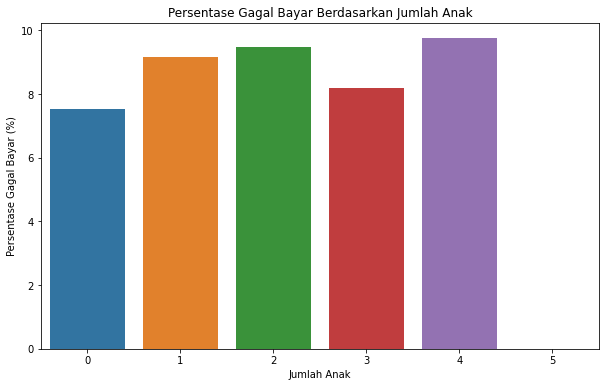

In [122]:
# Plot grafik bar
plt.figure(figsize=(10, 6))
sns.barplot(x=debt_by_child.index, y='persen gagal', data=debt_by_child)
plt.title('Persentase Gagal Bayar Berdasarkan Jumlah Anak')
plt.xlabel('Jumlah Anak')
plt.ylabel('Persentase Gagal Bayar (%)')

# Tampilkan grafik
plt.show()


**Kesimpulan**
1. keluarga yang memiliki 0 anak memiliki kencenderungan paling sedikit untuk gagal kredit dibandingkan dengan keluarga lain
2. keluarga yang memiliki 1 anak memiliki probabilitas gagal kredit yang lebih sedikit dibandingkan dengan keluarga yang memiliki 4 anak dan 2 anak, akan tetapi hanya memiliki perbedaan yang sangat kecil, maka ada kemungkinan probabilitasnya dapat meningkat
3. kelompok keluarga dengan 2 anak menjadi yang paling tinggi nomor 2 dalam kegagalan kredit, sehingga ini sangat perlu untuk diperhatikan
4. pada kelompok keluarga dengan 3 anak kemungkinan gagal kreditnya tergolong rendah jika dibandingkan dengan kelompok lain, akan tetapi tetap harus lebih diperhatikan
5. berdasarkan data tabel dapat dilihat bahwa anggota credit yang memiliki anak 4 lebih memiliki probabilitas tinggi untuk terjadinya gagal kredit, kemungkinan ini disebabkan oleh banyaknya kebutuhan individu yang harus dipenuhi, akan tetapi nilai tersebut tidak berbanding lurus dengan data yang lain
6. jumlah anak 5 justru tidak ada satupun yang mengalami gagal credit.

sehingga dapat disimpulkan, jumlah anak tidak mempengaruhi terjadinya gagal kredit

**Apakah terdapat korelasi antara status keluarga dengan probabilitas melakukan gagal bayar pinjaman?** <a id='family'></a>

In [123]:
# Periksa data status keluarga dan data gagal bayar pinjaman
debt_by_family = credit_cleaned.pivot_table(
                index='family_status',
                columns='debt',
                values='days_employed',
                aggfunc='count')


In [124]:
# Hitung persentase gagal bayar berdasarkan status keluarga
debt_by_family['persen gagal'] = debt_by_family[1] / (debt_by_family[1]+debt_by_family[0]) * 100
debt_by_family.sort_values(by='persen gagal', ascending=True)

debt,0,1,persen gagal
family_status,,,
widow / widower,896,63,6.569343
divorced,1110,85,7.112971
married,11408,931,7.545182
civil partnership,3761,388,9.351651
unmarried,2536,274,9.750890


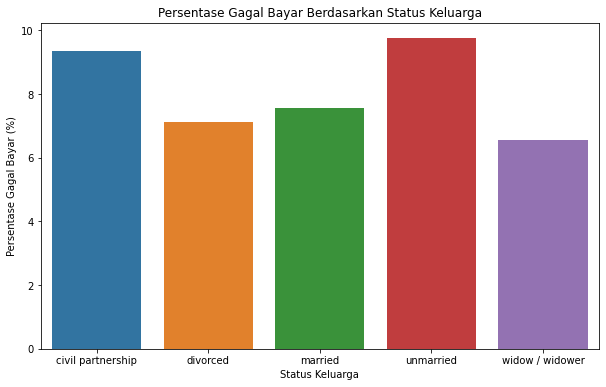

In [125]:
# Plot grafik bar
plt.figure(figsize=(10, 6))
sns.barplot(x=debt_by_family.index, y='persen gagal', data=debt_by_family)
plt.title('Persentase Gagal Bayar Berdasarkan Status Keluarga')
plt.xlabel('Status Keluarga')
plt.ylabel('Persentase Gagal Bayar (%)')

# Tampilkan grafik
plt.show()


**Kesimpulan**

1. dilihat dari data di atas diketahui bahwa peminjam yang belum menikah lebih banyak mengalami gagal credit, kemungkinan ini terjadi dikarenakan target yang belum terpenuhi, seperti biaya pernikahan
2. begitu pula dengan `civil_partnership` memiliki persentase sekitar 9%,
3. sedangkan untuk orang yang sudah menikah, bercerai, maupun janda/duda kemungkinan gagal kreditnya lebih kecil, kemungkinan ini dikarenakan target dan tanggungan yang dimiliki sudah lebih jelas dan financial planning yang lebih baik.

disimpulkan bahwa status keluarga mempengaruhi besarnya kemungkinan gagal kredit

**Apakah terdapat korelasi antara tingkat pendapatan dengan probabilitas melakukan gagal bayar pinjaman?** <a id='income'></a>

In [126]:
# Periksa data tingkat pendapatan dan data gagal bayar pinjaman
debt_by_income = credit_cleaned.pivot_table(
                index='income_range',
                columns='debt',
                values='days_employed',
                aggfunc='count')


In [127]:
# Hitung persentase gagal bayar berdasarkan tingkat pendapatan
debt_by_income['persen gagal'] = debt_by_income[1] / (debt_by_income[1]+debt_by_income[0]) * 100
debt_by_income.sort_values(by='persen gagal', ascending=True)

debt,0,1,persen gagal
income_range,,,
tinggi,634,38,5.654762
cukup tinggi,1984,156,7.289720
rendah,6833,613,8.232608
menengah,10260,934,8.343756


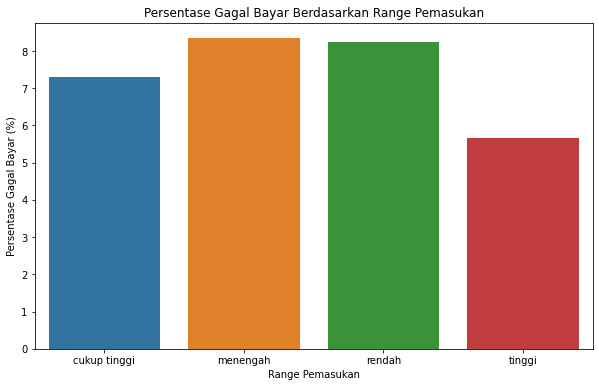

In [128]:
# Plot grafik bar
plt.figure(figsize=(10, 6))
sns.barplot(x=debt_by_income.index, y='persen gagal', data=debt_by_income)
plt.title('Persentase Gagal Bayar Berdasarkan Range Pemasukan')
plt.xlabel('Range Pemasukan')
plt.ylabel('Persentase Gagal Bayar (%)')

# Tampilkan grafik
plt.show()


**Kesimpulan**

1. peminjam yang cenderung melakukan gagal bayar kebanyakan adalah dengan pendapatan menengah dan rendah kemungkinan ini dikarenakan pendapatan yang tidak mencukupi untuk membayar jumlah hutang yang dimiliki sehingga kegagalan credit sering terjadi.
2. peminjam dengan pendapatan cukup tinggi harus tetap diperhatikan meskipun persentase gagal kredit tidak sebanyak tingkat menengah dan rendah, kelompok ini masih berpotensi untuk memiliki persentase yang meningkat
3. peminjam dengan kelompok pendapatan tinggi cenderung memiliki persentase gagal kredit lebih rendah

disimpulkan bahwa jumlah pemasukan mempengaruhi terjadinya gagal kredit

**Bagaimana tujuan kredit memengaruhi persentase gagal bayar?** <a id='purpose'></a>

In [129]:
debt_by_purpose = credit_cleaned.pivot_table(
                index='purpose_category',
                columns='debt',
                values='days_employed',
                aggfunc='count')


In [130]:
# Periksa persentase tingkat gagal bayar untuk setiap tujuan kredit dan lakukan penganalisisan
debt_by_purpose['persen gagal'] = debt_by_purpose[1] / (debt_by_purpose[1]+debt_by_purpose[0]) * 100
debt_by_purpose.sort_values(by='persen gagal', ascending=True)

debt,0,1,persen gagal
purpose_category,,,
real estate,10028,782,7.234043
wedding,2137,186,8.006888
education,3643,370,9.220035
car,3903,403,9.359034


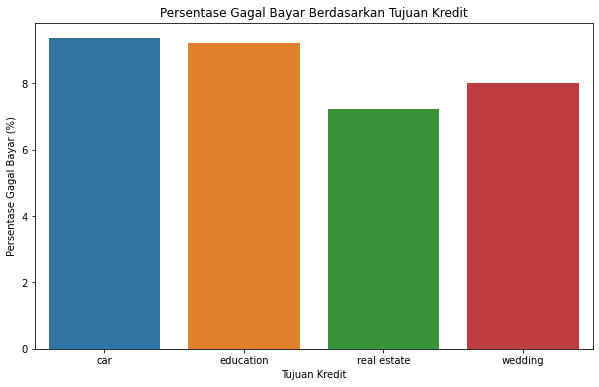

In [131]:
# Plot grafik bar
plt.figure(figsize=(10, 6))
sns.barplot(x=debt_by_purpose.index, y='persen gagal', data=debt_by_purpose)
plt.title('Persentase Gagal Bayar Berdasarkan Tujuan Kredit')
plt.xlabel('Tujuan Kredit')
plt.ylabel('Persentase Gagal Bayar (%)')

# Tampilkan grafik
plt.show()


**Kesimpulan**

1. dari data dapat dilihat bahwa kebutuhan untuk membeli mobil cenderung sering mengalami kegagalan kredit, mungkin ini dikarenakan kebutuhan membeli mobil memiliki jangka waktu kredit yang sebentar sehingga cicilan perbulannya menjadi besar dan banyak yang mengalami gagal kredit disebabkan oleh hal tersebut
2. begitu pula untuk biaya pendidikan, dengan jangka waktu yang pendek lebih sering untuk menyebabkan gagal kredit
3. sedangkan untuk biaya pernikahan hanya akan diperlukan sekali dan dengan biaya yang tidak terlalu besar terdapat di posisi ketiga penyebab gagal kredit
4. untuk pembelian property/real estate cenderung mendapati posisi terendah karena mungkin jangka waktu kredit yang panjang dan biaya kredit yang kecil setiap bulannya

disimpulkan bahwa tujuan kredit mempengaruhi probabilitas gagal kredit

# Kesimpulan umum <a id='conclusions'></a>

Tuliskan kesimpulanmu di bagian akhir ini. Pastikan kamu memasukkan semua kesimpulan penting yang telah kamu buat berkaitan dengan caramu memproses dan menganalisis data. Kesimpulan tersebut harus membahas nilai yang hilang, duplikat, dan kemungkinan alasan, serta solusi untuk data bermasalah yang harus kamu tangani.
1. nilai yang hilang pada kolom `days_employed` dan `total_income` ditangani dengan mencari hubungannya dengan faktor-faktor lain yang telah diketahui salah satunya menggunakan `age_category` karena `age_category` membantu menganalisis perbedaan usia ternyata mempengaruhi `total_income` yang diperoleh untuk mempertimbangkan outliers dipilihlah median berdasarkan `age_category` untuk menggantikan nilai yang hilang, begitupun pada `days_employed`, `age_category` membantu menentukan perkiraan berapa lama seseorang bekerja ditinjau dari usianya, untuk mempertimbangkan outliers dipilih juga median berdasarkan `age_category` untuk menggantikan nilai yang hilang.
2. data duplikat pada file ini kebetulan hanya memiliki persentase yang sangat sedikit sehingga bisa dipertimbangkan untuk hanya menghapusnya menggunakan `drop_duplicates`
3. untuk mendapatkan kesimpulan diperlukan pengkategorian data, dan data yang dipilih ada data kategorik `purpose` dan data numerik `total_income` 

[Tuliskan juga kesimpulanmu mengenai pertanyaan-pertanyaan yang diajukan di sini.]


1. Apakah terdapat hubungan antara memiliki anak dan probabilitas seseorang melakukan gagal bayar pinjaman?
>jumlah anak secara garis besar tidak mempengaruhi kemungkinan gagal kredit, dari data dilihat bahwa keluarga dengan anak 4 cenderung memiliki probabilitas gagal kredit yang tinggi, diikuti dengan keluarga dengan 2 anak, 1 anak, 3 anak, 0 anak dan 5 anak.

2. Apakah terdapat hubungan antara status perkawinan dan probabilitas seseorang melakukan gagal bayar pinjaman?
> dilihat dari status keluarga, seseorang yang belum menikah dan memiliki partner cenderung memiliki probabilitas gagal kredit yang lebih tinggi dibandingkan dengan seseorang yang sudah berkeluarga, bercerai dan duda/janda


3. Apakah terdapat hubungan antara tingkat pendapatan dan probabilitas seseorang melakukan gagal bayar pinjaman?
> kelompok dengan pendapatan kecil dan menengah lebih berpotensi mengalami gagal kredit dibandingkan dengan kelompok berpenghasilan tinggi dan cukup tinggi


4. Bagaimana perbedaan tujuan pinjaman memengaruhi probabilitas seseorang melakukan gagal bayar pinjaman?
> kebutuhan/ tujuan yang bersifat cicilan jangka pendek seperti pembelian mobil, pendidikan, dan pernikahan cenderung berpotensi mengalami kredit yang lebih tinggi dibandingkan dengan pembelian real estate

# Temuan <a id='end'></a>

Dari data set di atas diketahui bahwa terdapat data yang hilang yaitu pada kolom `total_income` dan `days_employed` dengan letak posisi yang sama dan jumlah nilai yang yang sama, saat dilakukan pengecekan distribusi menggunakan data `credit_null`, `credit` dan `credit_nonull` di dapatkan tingkatan yang persis sama pula, ini membuktikan bahwa sebelum membuat kesimpulan pemeriksaan data yang mendetail juga sangat diperlukan. penyeragaman/transformasi dan pembuatan kategori terbukti sangat berfungsi baik dalam membantu menganalisa dan membuat kesimpulan.

[Kembali ke Konten](#back)